In [ ]:
import numpy as np
import pandas as pd
import math
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
%matplotlib inline


In [ ]:
'''
本次实现中可能有的问题：
１．　距离计算：
其实只要知道距离度量的公式，然后对math库有基本的了解，知道指数函数，绝对值函数就没问题
这里提供了两种方式，一种是手写python，实现距离计算
另一种是使用numpy.linalg.norm()函数，这个是计算矩阵或向量的范数的，第一个参数是要计算的两个数的差值，第二个参数是距离度量方式的选择

２．　这里近邻搜索使用的暴力线性扫描，因为数据不大，看不出慢。
在sklearn调用knn时，使用了《统计学习方法》中提到的kd-tree.

３． 因为Ｋｎｎ没有显式地学习过程，预测的过程就是学习的过程，所以训练预测都在predict方法中了。

４．　这里将数据集分成了训练集和测试集，并实现了ｓｃｏｒｅ方法，计算测试集上的accuracy.

总的来说，只要完全搞懂《统计学习方法》中的理论，实现起来还是比较愉快的，
以后有机会好好实现下kd-tree.
'''

In [11]:
#load data与感知机所用相同
data=load_iris()
# print(data)
df=pd.DataFrame(data.data,columns=data.feature_names)
df['label']=data.target
df.columns=['sl','sw','pl','pw','label']

# X,y
X=np.array(df.iloc[:100,[0,1]])
y=np.array(df.iloc[:100,-1])

y=np.array([-1 if i==0 else 1 for i in y  ])

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [19]:
class KNN():
    def __init__(self,X_train,y_train,k=3,p=2):
        self.k=k
        self.p=p
        self.X_train=X_train
        self.y_train=y_train
    def _distant(self,p,x1,x2):
        if p==1 or p==2:
            return math.pow(sum([math.pow(abs(i-j),p)  for i,j in zip(x1,x2)]),1/p)
        if p==math.inf:
            return max([abs(i-j) for i,j in zip(x1,x2)])
    def predict(self,xp):
        # 此处近邻搜索使用暴力搜索，线性扫描
        knn_list=[]
        for i in range(0,len(self.X_train)):
            if len(knn_list)<self.k:
                # knn_list.append((i,self._distant(self.p,xp,self.X_train[i])))
                knn_list.append((i,np.linalg.norm(abs(X_train[i]-xp),ord=self.p)))
            else:
                maxd=max(knn_list,key=lambda a:a[1])
                # dist=self._distant(self.p,xp,self.X_train[i])
                dist=np.linalg.norm(abs(X_train[i]-xp),ord=self.p)
                if dist<maxd[1]:
                    knn_list[knn_list.index(maxd)]=(i,dist)
        
        c=sorted(Counter([self.y_train[i[0]] for i in knn_list]),reverse=True)
        return c[0]

    def score(self,X_test,y_test):
        acc=0
        for i in range(len(X_test)):
            if y_test[i]==self.predict(X_test[i]):
                acc+=1
        return acc/len(y_test)

Test Point:1
test acc score:1.0


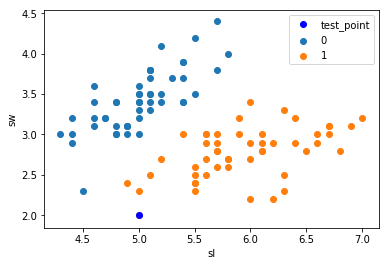

In [23]:
test_points=[5.0,2.0]
knn=KNN(X_train,y_train)
print('Test Point:{}'.format(knn.predict(test_points)))

plt.scatter(df.iloc[:50,0],df.iloc[:50,1],label='0')
plt.scatter(df.iloc[50:100,0],df.iloc[50:100,1],label='1')
plt.plot(test_points[0],test_points[1],'bo',label='test_point')
plt.xlabel('sl')
plt.ylabel('sw')
plt.legend()

print('test acc score:{}'.format(knn.score(X_test,y_test)))


In [22]:
# sklearn KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# 此处近邻搜索算法使用kd_tree
knn=KNeighborsClassifier(algorithm='kd_tree')
knn.fit(X_train,y_train)
print('knn from sklearn test points:{}'.format(knn.predict([[6.0,3.0]])))
print('knn from sklearn test acc score:{}'.format(knn.score(X_test,y_test)))

knn from sklearn test points:[1]
knn from sklearn test acc score:1.0
